In [1]:
import pandas as pd

In [2]:
# Memasukkan dan menampilkan data kejadian peralatan tambang
raw_data = pd.read_excel('RawDataEvent_NovDes.xlsx')
raw_data

,ProjectID,ProdDate,ShiftID,Service,EquipmentID,SerialNumber,EquipmentModel,SMUStart,SMUEnd,TotalSMU,...,StartTime,EndTime,Status,Reason,TimeDuration,EventDetailRemarks,EquipmentRemarks,OperatorSN,OperatorName,ActualProdID
0,BMB-TPN,2020-11-01,DS,OB,XCC1020,RK800365,CS11GC,1612.1,1614.5,2.4,...,07:00:00,14:00:00,3 - STANDBY,314 - AVAILABLE NOT REQUIRED,7.0,NaN,NaN,52412,AGUS WIYONO,A-BMB-TPN11012020-DS
1,BMB-TPN,2020-11-01,DS,OB,XCC1020,RK800365,CS11GC,1612.1,1614.5,2.4,...,14:00:00,16:24:00,2 - IDLE/DELAY,201 - GENERAL SUPPORT WORK,2.4,NaN,NaN,52412,AGUS WIYONO,A-BMB-TPN11012020-DS
2,BMB-TPN,2020-11-01,DS,OB,XCC1020,RK800365,CS11GC,1612.1,1614.5,2.4,...,16:24:00,19:00:00,3 - STANDBY,314 - AVAILABLE NOT REQUIRED,2.6,NaN,NaN,52412,AGUS WIYONO,A-BMB-TPN11012020-DS
3,BMB-TPN,2020-11-01,DS,OB,XCC1026,TJL06528,CS-533E,3847.7,3847.7,0.0,...,07:00:00,19:00:00,4 - DOWN,403 - HYDRAULIC SYSTEM,12.0,"Warning hyd on, Hyd Lock",NaN,NaN,NaN,A-BMB-TPN11012020-DS
4,BMB-TPN,2020-11-01,DS,OB,CD142,0WDM02579,D9R,21627.0,21627.0,0.0,...,07:00:00,17:54:00,4 - DOWN,416 - AC,10.9,AC get Hot,NaN,NaN,NaN,A-BMB-TPN11012020-DS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120871,BMB-TPN,2020-12-31,NS,OB,CO072,0,773E,45383.9,45391.9,8.0,...,05:00:00,05:24:00,3 - STANDBY,310 - SEMBAHYANG,0.4,NaN,SITARUM,51654,ROMADHONI,A-BMB-TPN12312020-NS
120872,BMB-TPN,2020-12-31,NS,OB,CO072,0,773E,45383.9,45391.9,8.0,...,05:24:00,06:00:00,1 - READY,103 - 2OBR - OVERBURDEN,0.6,NaN,SITARUM,51654,ROMADHONI,A-BMB-TPN12312020-NS
120873,BMB-TPN,2020-12-31,NS,OB,CO072,0,773E,45383.9,45391.9,8.0,...,06:00:00,06:12:00,3 - STANDBY,326 - SET UP WORKING AREA,0.2,NaN,SITARUM,51654,ROMADHONI,A-BMB-TPN12312020-NS
120874,BMB-TPN,2020-12-31,NS,OB,CO072,0,773E,45383.9,45391.9,8.0,...,06:12:00,07:00:00,1 - READY,103 - 2OBR - OVERBURDEN,0.8,NaN,SITARUM,51654,ROMADHONI,A-BMB-TPN12312020-NS


In [3]:
# Melihat jumlah data unik untuk setiap kolom/fitur data
raw_data.nunique(axis=0)

ProjectID                 1
ProdDate                 61
ShiftID                   2
Service                   2
EquipmentID             170
SerialNumber            163
EquipmentModel           25
SMUStart              16333
SMUEnd                16249
TotalSMU                121
SMUInitial            47717
SMUFinal              47717
SMUDifference            92
StartTime               242
EndTime                 242
Status                    4
Reason                   87
TimeDuration            121
EventDetailRemarks     2768
EquipmentRemarks          2
OperatorSN              450
OperatorName            446
ActualProdID            122
dtype: int64

In [4]:
# Melihat jumlah data kosong untuk setiap kolom/fitur pada data
raw_data.isna().sum()

ProjectID                  0
ProdDate                   0
ShiftID                    0
Service                    0
EquipmentID                0
SerialNumber               0
EquipmentModel             0
SMUStart                   0
SMUEnd                     0
TotalSMU                   0
SMUInitial                 0
SMUFinal                   0
SMUDifference              0
StartTime                  0
EndTime                    0
Status                     0
Reason                     0
TimeDuration               0
EventDetailRemarks    105040
EquipmentRemarks      120764
OperatorSN              6158
OperatorName            6158
ActualProdID               0
dtype: int64

In [5]:
# Mengeluarkan kolom/fitur yang tidak diperlukan
data_dropped = raw_data.drop(['ProjectID','SerialNumber','EventDetailRemarks','EquipmentRemarks','OperatorSN','OperatorName','ActualProdID'],
                             axis=1)

In [6]:
# Melihat jumlah data untuk setiap nilai pada kolom EquipmentModel
raw_data['EquipmentModel'].value_counts()

777D         56889
775F         11666
340D2L        7166
320GC         5814
WT            5568
773E          5192
6030-BH       4398
D6R           3328
390FL         3071
14M3          2617
D10           2227
EX1200-6      2205
6015B         2021
D9T           1501
16M           1467
D9R           1463
D8R            900
CS11GC         724
330GC          681
320D           658
330D2L         544
320NG          361
CS-533E        292
R984C          122
0FKR01752        1
Name: EquipmentModel, dtype: int64

In [7]:
import numpy as np

In [8]:
# Memilih model(tipe) peralatan yang digunakan untuk memprediksi, dalam hal ini dipilih tipe 777D
data_selected = data_dropped[data_dropped['EquipmentModel']=='777D']
data_selected

,ProdDate,ShiftID,Service,EquipmentID,EquipmentModel,SMUStart,SMUEnd,TotalSMU,SMUInitial,SMUFinal,SMUDifference,StartTime,EndTime,Status,Reason,TimeDuration
579,2020-11-01,DS,OB,CO043,777D,56234.4,56234.4,0.0,56234.4,56234.4,0.0,07:00:00,19:00:00,4 - DOWN,504 - SERVICE PM,12.0
580,2020-11-01,DS,OB,CO056,777D,51188.3,51194.2,5.9,51188.3,51188.3,0.0,07:00:00,08:00:00,3 - STANDBY,306 - JALAN LICIN,1.0
581,2020-11-01,DS,OB,CO056,777D,51188.3,51194.2,5.9,51188.3,51188.3,0.0,08:00:00,09:30:00,3 - STANDBY,304 - HUJAN,1.5
582,2020-11-01,DS,OB,CO056,777D,51188.3,51194.2,5.9,51188.3,51188.3,0.0,09:30:00,10:00:00,3 - STANDBY,306 - JALAN LICIN,0.5
583,2020-11-01,DS,OB,CO056,777D,51188.3,51194.2,5.9,51188.3,51191.3,3.0,10:00:00,13:00:00,1 - READY,103 - 2OBR - OVERBURDEN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120827,2020-12-31,NS,OB,CO4396,777D,22740.5,22747.7,7.2,22745.1,22746.1,1.0,04:00:00,05:00:00,1 - READY,103 - 2OBR - OVERBURDEN,1.0
120828,2020-12-31,NS,OB,CO4396,777D,22740.5,22747.7,7.2,22746.1,22746.1,0.0,05:00:00,05:24:00,3 - STANDBY,310 - SEMBAHYANG,0.4
120829,2020-12-31,NS,OB,CO4396,777D,22740.5,22747.7,7.2,22746.1,22747.7,1.6,05:24:00,07:00:00,1 - READY,103 - 2OBR - OVERBURDEN,1.6
120830,2020-12-31,NS,OB,CO4397,777D,50189.4,50189.4,0.0,50189.4,50189.4,0.0,19:00:00,07:00:00,3 - STANDBY,317 - HOLIDAY,12.0


In [9]:
# Melihat data unik untuk setiap kolom/fitur pada data yang baru
data_selected.nunique(axis=0)

ProdDate             61
ShiftID               2
Service               2
EquipmentID          66
EquipmentModel        1
SMUStart           6653
SMUEnd             6604
TotalSMU            119
SMUInitial        21783
SMUFinal          21791
SMUDifference        69
StartTime           241
EndTime             241
Status                4
Reason               69
TimeDuration        121
dtype: int64

In [10]:
eq_id = data_selected['EquipmentID'].unique()
dates = data_selected['ProdDate'].unique()
shifts = data_selected['ShiftID'].unique()
status = data_selected['Status'].unique()
status.sort()

In [11]:
import numpy as np
arr = np.empty((0,8))

In [12]:
# Mengubah (transformasi) bentuk data agar sesuai untuk dijadikan input pada model prediksi
for eq in eq_id:
    for date in dates:
        for shift in shifts:
            SMU = data_selected[(data_selected['EquipmentID']==eq)&
                                (data_selected['ProdDate']==date)&
                                (data_selected['ShiftID']==shift)]['TotalSMU'].mean()
            row = np.array([eq,date,shift,SMU])
            for i,stat in enumerate(status):
                dur = data_selected[(data_selected['EquipmentID']==eq)&
                                    (data_selected['ProdDate']==date)&
                                    (data_selected['ShiftID']==shift)&
                                    (data_selected['Status']==stat)]['TimeDuration'].sum()
                row = np.append(row, np.array(dur))
            arr = np.append(arr, np.array([row]),axis=0)

In [13]:
# Membuat dataframe yang baru
new_data = pd.DataFrame(arr, columns=['ID','Date','Shift','SMU','Duration1','Duration2','Duration3','Duration4'])

In [14]:
# Mengubah tipe data menjadi bilangan desimal yang bisa dioperasikan
new_data.SMU = new_data.SMU.astype(float)
new_data.Duration1 = new_data.Duration1.astype(float)
new_data.Duration2 = new_data.Duration2.astype(float)
new_data.Duration3 = new_data.Duration3.astype(float)
new_data.Duration4 = new_data.Duration4.astype(float)

In [15]:
# Membuat variabel RUL yang digunakan sebagai target prediksi
rul_arr = np.array([])
for eq in eq_id:
    mt_dur = new_data[new_data['ID']==eq]['Duration4'].values
    for i in range(len(mt_dur)):
        rul = 0
        for j in range(i,len(mt_dur)):
            if (mt_dur[j]==0):
                rul = rul + 1
            else:
                break
        rul_arr = np.append(rul_arr, rul)

In [16]:
# Menambahkan variabel baru (RUL) ke dalam dataset
new_data['RUL'] = rul_arr

In [17]:
new_data

,ID,Date,Shift,SMU,Duration1,Duration2,Duration3,Duration4,RUL
0,CO043,2020-11-01T00:00:00.000000000,DS,0.0,0.0,0.0,0.0,12.0,0.0
1,CO043,2020-11-01T00:00:00.000000000,NS,0.0,0.0,0.0,0.0,12.0,0.0
2,CO043,2020-11-02T00:00:00.000000000,DS,0.0,0.0,0.0,0.0,12.0,0.0
3,CO043,2020-11-02T00:00:00.000000000,NS,0.0,0.0,0.0,0.0,12.0,0.0
4,CO043,2020-11-03T00:00:00.000000000,DS,0.0,0.0,0.0,0.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...
8047,CO4402,2020-12-29T00:00:00.000000000,NS,5.8,5.8,0.0,6.2,0.0,3.0
8048,CO4402,2020-12-30T00:00:00.000000000,DS,4.5,4.5,0.0,7.5,0.0,2.0
8049,CO4402,2020-12-30T00:00:00.000000000,NS,1.1,1.1,0.0,10.9,0.0,1.0
8050,CO4402,2020-12-31T00:00:00.000000000,DS,1.2,1.0,0.2,4.0,6.8,0.0


In [18]:
# Fungsi untuk mengubah data time series ke supervised (agar dapat diprediksi dengan machine learning)
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [19]:
# Memilih variabel fix yang akan dimasukkan ke dalam model
# RUL sebagai variabel dependen
# Selain RUL digunakan sebagai variabel independen
dataset = new_data[['SMU','Duration1','Duration2','Duration3','Duration4','RUL']].values

In [20]:
# Menyiapkan objek untuk mengubah skala data
from sklearn.preprocessing import MinMaxScaler

values = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [21]:
raw_produksi = pd.read_excel("RawDataProduksi_NovDes.xlsx")
raw_produksi = raw_produksi[raw_produksi['HaulingModel'] == '777D']

In [22]:
dis_rit = np.empty((0,2))
for eq in eq_id:
    for date in dates:
        for shift in shifts:
            dis = raw_produksi[(raw_produksi['HaulingEq']==eq)&
                               (raw_produksi['ProdDate']==date)&
                               (raw_produksi['ShiftID']==shift)]['distance'].unique().sum()
            rit = raw_produksi[(raw_produksi['HaulingEq']==eq)&
                               (raw_produksi['ProdDate']==date)&
                               (raw_produksi['ShiftID']==shift)]['Ritation'].unique().sum()
            row = np.array([dis, rit])

            dis_rit = np.append(dis_rit, np.array([row]),axis=0)

In [23]:
df_dis = pd.DataFrame(dis_rit[:,0])
df_rit = pd.DataFrame(dis_rit[:,1])

In [24]:
new_data.insert(8, 'Distance', df_dis)
new_data.insert(8, 'Ritation', df_rit)

In [25]:
new_data.tail(5)

,ID,Date,Shift,SMU,Duration1,Duration2,Duration3,Duration4,Ritation,Distance,RUL
8047,CO4402,2020-12-29T00:00:00.000000000,NS,5.8,5.8,0.0,6.2,0.0,16.0,5500.0,3.0
8048,CO4402,2020-12-30T00:00:00.000000000,DS,4.5,4.5,0.0,7.5,0.0,12.0,2030.0,2.0
8049,CO4402,2020-12-30T00:00:00.000000000,NS,1.1,1.1,0.0,10.9,0.0,3.0,4130.0,1.0
8050,CO4402,2020-12-31T00:00:00.000000000,DS,1.2,1.0,0.2,4.0,6.8,3.0,2750.0,0.0
8051,CO4402,2020-12-31T00:00:00.000000000,NS,0.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0


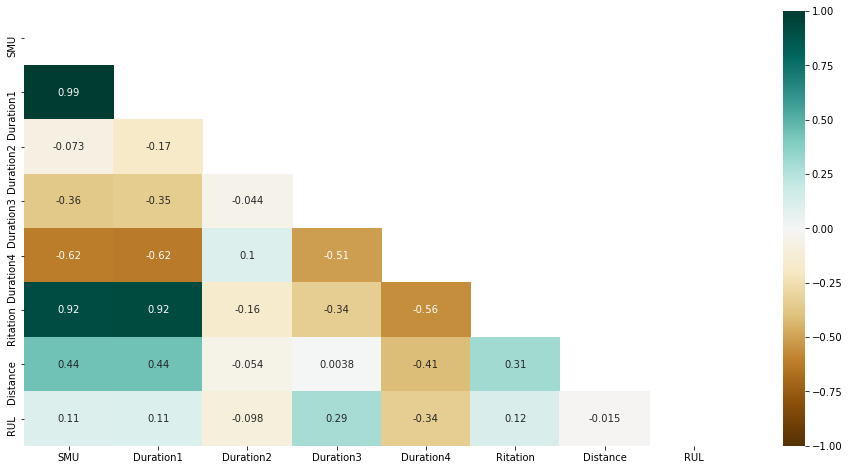

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plot_data = new_data[new_data.columns[3:]].astype('float32')
mask = np.triu(np.ones_like(plot_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(plot_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [65]:
ds = new_data[['SMU','Duration3','Duration4','Ritation','RUL']].values

In [66]:
values = ds.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))

In [67]:
nshift = 4 #jumlah waktu nshift data yg digunakan sebelum waktu shift RUL yang diprediksi
nfeatures = 4 #jumlah fitur (data independen)

In [68]:
reframed = series_to_supervised(values, nshift, 1)
reframed.drop(['var5(t-4)','var5(t-3)','var5(t-2)','var5(t-1)'], axis=1, inplace=True)
reframed.drop(range(4,19), inplace=True) # karena data ini dari awal sudah maintenance,

In [69]:
values = reframed.values
scaled = scaler.fit_transform(values)

In [70]:
from sklearn.model_selection import train_test_split
X = scaled[:,:-1]
y = scaled[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape)

(5623, 20) (5623,)


In [71]:
X_train = X_train.reshape((X_train.shape[0], nshift+1, nfeatures))
X_test = X_test.reshape((X_test.shape[0], nshift+1, nfeatures))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5623, 5, 4) (5623,) (2410, 5, 4) (2410,)


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mae', optimizer='adam')

In [73]:
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=2, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/50
2812/2812 - 18s - loss: 0.0563 - val_loss: 0.0520
Epoch 2/50
2812/2812 - 17s - loss: 0.0533 - val_loss: 0.0492
Epoch 3/50
2812/2812 - 16s - loss: 0.0517 - val_loss: 0.0488
Epoch 4/50
2812/2812 - 18s - loss: 0.0506 - val_loss: 0.0474
Epoch 5/50
2812/2812 - 17s - loss: 0.0505 - val_loss: 0.0471
Epoch 6/50
2812/2812 - 17s - loss: 0.0496 - val_loss: 0.0472
Epoch 7/50
2812/2812 - 16s - loss: 0.0494 - val_loss: 0.0476
Epoch 8/50
2812/2812 - 16s - loss: 0.0491 - val_loss: 0.0473
Epoch 9/50
2812/2812 - 17s - loss: 0.0489 - val_loss: 0.0460
Epoch 10/50
2812/2812 - 17s - loss: 0.0491 - val_loss: 0.0488
Epoch 11/50
2812/2812 - 17s - loss: 0.0488 - val_loss: 0.0458
Epoch 12/50
2812/2812 - 17s - loss: 0.0485 - val_loss: 0.0457
Epoch 13/50
2812/2812 - 16s - loss: 0.0484 - val_loss: 0.0459
Epoch 14/50
2812/2812 - 16s - loss: 0.0486 - val_loss: 0.0459
Epoch 15/50
2812/2812 - 17s - loss: 0.0483 - val_loss: 0.0455
Epoch 16/50
2812/2812 - 18s - loss: 0.0482 - val_loss: 0.0456
Epoch 17/50
2812/

In [74]:
# make a prediction
y_pred_lstm = model_lstm.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], (nshift+1)*nfeatures))

In [75]:
# invert scaling for forecast (LSTM)
inv_ypred_lstm = np.concatenate((X_test, y_pred_lstm), axis=1)
inv_ypred_lstm = scaler.inverse_transform(inv_ypred_lstm)
inv_ypred_lstm = inv_ypred_lstm[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((X_test, y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [76]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_lstm = np.sqrt(mean_squared_error(inv_y, inv_ypred_lstm))
print('Test RMSE: %.3f' % rmse_lstm)

Test RMSE: 6.119


In [77]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
model_svm = svm.SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [100],
    'gamma': [0.05]
}

In [78]:
X_train = X_train.reshape((X_train.shape[0], (nshift+1)*nfeatures))
y_train = y_train.reshape((len(y_train)))

In [79]:
grid_search = GridSearchCV(model_svm, parameters)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.05, 'kernel': 'rbf'}


In [80]:
model_svm = svm.SVR(C=100, gamma=0.05, kernel='rbf')

In [81]:
history_svm = model_svm.fit(X_train, y_train)

In [82]:
# make a prediction
y_pred_svm = model_svm.predict(X_test)

In [83]:
# invert scaling for forecast (SVM)
inv_ypred_svm = np.concatenate((X_test, y_pred_svm.reshape((len(y_pred_svm),1))), axis=1)
inv_ypred_svm = scaler.inverse_transform(inv_ypred_svm)
inv_ypred_svm = inv_ypred_svm[:,-1]

In [84]:
rmse_svm = np.sqrt(mean_squared_error(inv_y, inv_ypred_svm))
print('Test RMSE: %.3f' % rmse_svm)

Test RMSE: 6.494


In [85]:
rmse_svm_norm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
rmse_lstm_norm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))

In [86]:
print("RMSE Model SVM (Normalisasi)  :", rmse_svm_norm)
print("RMSE Model LSTM (Normalisasi) :", rmse_lstm_norm)

RMSE Model SVM (Normalisasi)  : 0.08433643879001915
RMSE Model LSTM (Normalisasi) : 0.07946418


In [87]:
print("RMSE Model SVM  :", rmse_svm)
print("RMSE Model LSTM :", rmse_lstm)

RMSE Model SVM  : 6.493905808159042
RMSE Model LSTM : 6.118742


In [88]:
df_ypred = pd.DataFrame({'ypred SVM':inv_ypred_svm,
                         'ypred LSTM':inv_ypred_lstm,
                         'ytest Actual':inv_y})
df_ypred

,ypred SVM,ypred LSTM,ytest Actual
0,9.252819,5.901516,7.000000
1,0.286384,0.000177,0.000000
2,8.434709,6.948579,9.000000
3,31.300076,33.178642,28.999998
4,9.202856,5.877342,1.000000
...,...,...,...
2405,8.218154,6.979512,18.000000
2406,-0.048831,-0.103619,0.000000
2407,6.453510,2.666380,1.000000
2408,17.009110,28.876657,53.000000
